# Particle Swarm Optimization for Solving the Traveling Salesman Problem 

# هدف کلی
الگوریتم بهینه سازی ازدحام ذرات (PSO) یک روش بهینه سازی فراابتکاری است که از رفتار دسته ای از پرندگان یا حیوانات دیگر الهام گرفته شده است. در الگوریتم PSO، جمعیتی از ذرات در فضای جستجو حرکت می‌کنند و هر ذره یک راه‌حل بالقوه برای مشکل را نشان می‌دهد. ذرات با یکدیگر ارتباط برقرار می کنند و موقعیت های خود را بر اساس تجربه خود و تجربه ازدحام به طور کلی به روز می کنند.
کلاس ParticleSwarmOptimization الگوریتم PSO را برای حل مشکل فروشنده دوره گرد (TSP) پیاده سازی می کند. TSP یک مشکل شناخته شده در علوم کامپیوتر و تحقیقات عملیاتی است که شامل یافتن کوتاه ترین مسیر ممکن برای دیدن مجموعه ای از شهرها و بازگشت به شهر شروع می شود.

# الگوریتم کلی
الگوریتم PSO یک الگوریتم هوش ازدحام است که رفتار گروهی از ذرات در حال حرکت در فضای جستجو را شبیه سازی می کند. الگوریتم با مقدار دهی اولیه جمعیتی از ذرات شروع می شود که هر ذره یک راه حل بالقوه برای مسئله را نشان می دهد. ذرات با موقعیت های تصادفی در فضای جستجو مقداردهی اولیه می شوند. سپس الگوریتم تناسب هر ذره را با اعمال تابع تناسب در موقعیت آن ارزیابی می کند.

الگوریتم PSO به طور مکرر سرعت و موقعیت هر ذره را در فضای جستجو بر اساس بهترین موقعیت شخصی خودش و بهترین موقعیت ازدحام جمعیت به روز می کند.در این معادلات، w وزن اینرسی، c1 و c2 ثابت‌های شتاب، rand() عددی تصادفی بین 0 و 1 است، pbest بهترین موقعیت شخصی ذره، gbest بهترین موقعیت جهانی جمعیت است، سرعت، سرعت ذره است و موقعیت، موقعیت ذره است.
سپس الگوریتم PSO تناسب هر ذره به روز شده را ارزیابی می کند و بهترین موقعیت شخصی و فیتنس هر ذره را به روز می کند. این الگوریتم همچنین بهترین موقعیت جهانی و تفیتنس جمعیت را به روز می کند. این فرآیند تا زمانی که یک معیار توقف، مانند حداکثر تعداد تکرار یا حداقل بهبود در فیتنس برآورده شود، تکرار می شود.
نکته دیگر اینکه بدلیل اینکه الگوریتم PSO به طور کلی بر روی فضای پیوسته حرکت میکند و مسئله TSP یک مسئله گسسته است، باید تغییراتی را برای حل این سوال اعمال کنیم. مثلا یک تابع جدید مینویسیم که دو ذره ، بتوانند با یکدیگر ترکیب شوند یا به عبارتی روی یکدیگر اثر بگذارند. همچنین، یک تابع جهش نیز باید به این مسئله اضافه کنیم.

# Class and Methods

### ابتدا کتابخانه هایی که نیاز داریم را ایمپورت میکنیم و ورودی را از کاربر میگیریم



In [1]:
import random
import numpy as np
from mpmath import mp
import math


In [2]:
def kth_min(array:list,k=0):
    temp = sorted(array)
    index = array.index(temp[k])
    return index

# Class and methods
کلاس ParticleSwarmOptimization برای پیاده سازی الگوریتم PSO برای TSP تعریف شده است. روش های زیر را دارد:
### مقداردهی اولیه
متد __init__ الگوریتم PSO را با پارامترهای زیر مقداردهی اولیه می کند:

pop_size: تعداد ذرات موجود در ازدحام.
city_size: تعداد شهرها در مسئله TSP.
مختصات: لیستی از تاپل ها حاوی مختصات هر شهر.
c1: تأثیر بهترین موضعی ذره را بر سرعت جدید آن کنترل می کند.
c2:تأثیر بهترین های ازدحام  را بر سرعت جدید آن کنترل می کند.
w: تأثیر سرعت قبلی ذره بر سرعت جدید آن را کنترل می کند.
کلاس همچنین چندین آرایه را برای ذخیره جمعیت، مقادیر فیتنس و بهترین موقعیت‌های شناخته شده ذرات مقداردهی اولیه می‌کند.
این الگوریتم تا زمانی ادامه می‌یابد که یک معیار توقف برآورده شود، مانند حداکثر تعداد تکرار یا یک راه‌حل رضایت‌بخش پیدا شود.

### توابع
#### اولیه(greedy_method='False')
این تابع با محاسبه ماتریس فاصله، تولید جمعیت اولیه و ارزیابی فیتنس هر ذره، الگوریتم PSO را مقداردهی اولیه می کند. همچنین موقعیت های شناخته شده محلی و ازدحام را تعیین می کند.
این روش دارای یک پارامتر اختیاری greedy_method است که می‌تواند روی «کم»، «متوسط»، «بالا» یا «بسیار زیاد» تنظیم شود تا به جای مسیر تصادفی، برخی ذرات را با یک مسیر حریصانه تولید کند. هر چه سطح بالاتر باشد، ذرات بیشتری با یک مسیر حریصانه تولید می شوند.

#### greedy_path(تصادفی:float=0.1)
این تابع یک مسیر حریصانه ایجاد می کند که از یک شهر تصادفی شروع می شود.

#### greedy_population()
این تابع جمعیتی از ذرات را با مسیرهای حریصانه تولید می کند که از شهرهای مختلف شروع می شود.

#### calc_distance (city_A, city_B)
این تابع فاصله اقلیدسی بین دو شهر را محاسبه می کند.

#### calc_distance_matrix()
این تابع ماتریس فاصله بین تمام جفت شهرها را محاسبه می کند.

#### fitness_function (path)
این تابع فاصله کل یک مسیر معین را محاسبه می کند.

#### ()value_swarm
این تابع موقعیت های شناخته شده محلی و جهانی ذرات را به روز می کند.

#### two_particles_intelligence()
این تابع تاثیر گرفتن بین دو ذره را انجام می دهد.

#### mutate()
این تابع جهش را روی یک ذره انجام می دهد.

#### next_iteration()
این تابع تکرار بعدی الگوریتم PSO را با به‌روزرسانی موقعیت و سرعت هر ذره، ارزیابی فیتنس هر ذره و به‌روزرسانی بهترین موقعیت‌ها انجام می‌دهد. اگر بهترین موقعیت شناخته شده جهانی به روز شود، به عنوان شناخته شده ترین موقعیت ازدحام نیز ذخیره می شود.

In [41]:
class ParticleSwarmOptimization:
    def __init__(self, pop_size: int, city_size: int, coordinates, c1=1, c2=1, w=0.5):
        # First we set our constants:
        self.pop_size = pop_size
        self.city_size = city_size   # ex: 4 cities
        self.c1 = c1
        self.c2 = c2
        self.w = w
        # Then we set our constant Arrays:
        self.coordinates = coordinates  # ex: [ (1,1), (1,4), (4,4), (4,1) ]
        self.distance_matrix = [[-1 for i in range(self.city_size)] for j in range(self.city_size)]
        # Then we set our variable Arrays:
        self.population = []
        self.fitness_arr = []

        self.local_best_population = []
        self.local_best_fitness = 0

        self.global_best_position = []
        self.global_best_fitness = 0

        self.swarm_best_fitness = 0
        self.swarm_best_position = []


    def initial(self,greedy_method='False'):
        # Calculate distances
        self.calc_distance_matrix()
        # Set the inital population completely random and calculate their fitness
        self.population = [list(random.sample(range(self.city_size), self.city_size)) for i in range(self.pop_size)]
        # Change some particle to greedy path if there is greedy method
        if greedy_method=='low':
            self.population[0:self.pop_size//20] = [self.greedy_path(randomness=0.2) for i in range(self.pop_size)][0:self.pop_size//20]
        elif greedy_method=='medium':
            self.population[0:self.pop_size//20] = [self.greedy_path() for i in range(self.pop_size)][0:self.pop_size//10]
        elif greedy_method == 'high':
            self.population[0:self.pop_size//10] = [self.greedy_path() for i in range(self.pop_size)][0:self.pop_size//10]
        elif greedy_method == 'very high':
            self.population = self.greedy_population()
            # self.population[0:self.pop_size//10] = [self.greedy_path() for i in range(self.pop_size)][0:self.pop_size//10]
        self.fitness_arr = [self.fitness_function(particle) for particle in self.population]

        # Calculate the first population fitnesses
        self.local_best_population = self.population
        self.local_best_fitness = self.fitness_arr

        best_init_fitness = min(self.fitness_arr)
        best_init_index = self.fitness_arr.index(best_init_fitness)
        best_init_position = self.population[best_init_index]

        self.global_best_position = best_init_position
        self.global_best_fitness = best_init_fitness
        
        self.swarm_best_position = self.global_best_position
        self.swarm_best_fitness = self.global_best_fitness

    def greedy_path(self,randomness:float=0.1):
        tour = []
        visited_cities = [False for i in range(self.city_size)]
        start_city = random.randint(0,self.city_size-1)
        tour.append(start_city)
        visited_cities[start_city] = True
        while len(tour)<self.city_size:
            k=0
            next_city = kth_min(self.distance_matrix[tour[-1]])
            while visited_cities[next_city] == True:
                k+=1
                next_city = kth_min(self.distance_matrix[tour[-1]], k=k)
                random_t = random.random()
                if random_t < randomness and len(tour) < 0.8 * self.city_size:
                    next_city = random.randint(0, self.city_size-1)
            tour.append(next_city)
            visited_cities[next_city] = True
        return tour
    
    def greedy_population(self):
        start_index = 0
        result = []
        for i in range(self.pop_size):
            rest = [x for x in range(0, self.city_size)]
            # All starting points have been generated
            if start_index >= self.city_size:
                start_index = np.random.randint(0, self.city_size)
                result.append(result[start_index].copy())
                continue
            current = start_index
            rest.remove(current)
            # find a nearest neighbor path
            result_particle = [current]
            while len(rest) != 0:
                tmp_min = math.inf
                tmp_choose = -1
                for x in rest:
                    if self.distance_matrix[current][x] < tmp_min:
                        tmp_min = self.distance_matrix[current][x]
                        tmp_choose = x

                current = tmp_choose
                result_particle.append(tmp_choose)
                rest.remove(tmp_choose)
            result.append(result_particle)
            start_index += 1
        return result



    def calc_distance(self, city_A, city_B):
        return math.sqrt((city_A[0] - city_B[0])**2
                    + (city_A[1] - city_B[1])**2)

    def calc_distance_matrix(self):
        for i in range(self.city_size):
            for j in range(self.city_size):
                self.distance_matrix[i][j] = self.calc_distance(
                    self.coordinates[i], self.coordinates[j])

    def fitness_function(self, path):
        fitness_value = 0
        for i in range(self.city_size-1):
            fitness_value += self.distance_matrix[path[i]][path[i+1]]
        # Distance between Last city and First city:
        fitness_value += self.distance_matrix[path[self.city_size-1]
                                              ][path[0]]
        return fitness_value  # Fitness value is the length of the path

    def evaluate_swarm(self):
        min_fitness = min(self.fitness_arr)
        min_index = self.fitness_arr.index(min_fitness)
        cur_path = self.population[min_index]
        # update the current global optimum
        if min_fitness < self.global_best_fitness:
            self.global_best_fitness = min_fitness
            self.global_best_position = cur_path
        # Update the current individual best
        for i, fitness in enumerate(self.fitness_arr):
            if fitness < self.local_best_fitness[i]:
                self.local_best_fitness[i] = fitness
                self.local_best_population[i] = self.population[i]

    # two particle intelligence
    def two_particles_intelligence(self, cur, best):
        particle = cur.copy()
        cities_index = list(range(self.city_size))
        t = np.random.choice(cities_index, 2)
        x = min(t)
        y = max(t)
        cross_part = best[x:y]
        tmp = []
        for t in particle:
            if t in cross_part:
                continue
            tmp.append(t)
        # two crossover methods
        particle = tmp + cross_part
        fitness1 = self.fitness_function(particle)
        particle2 = cross_part + tmp
        fitness2 = self.fitness_function(particle2)
        if fitness1 < fitness2:
            return particle, fitness1
        else:
            return particle, fitness2

    # particle mutation
    def mutate(self, particle):
        particle = particle.copy()
        cities_index = list(range(self.city_size))
        t = np.random.choice(cities_index, 2)
        x, y = min(t), max(t)
        particle[x], particle[y] = particle[y], particle[x]
        fitness2 = self.fitness_function(particle)
        return particle, fitness2

    # iterative operation
    def next_iteration(self):
        # update particle swarm
        for i, particle in enumerate(self.population):
            curr_fitness = self.fitness_arr[i]
            # Crossover with the current individual local optimal solution
            new_particle, new_fitness = self.two_particles_intelligence(particle, self.local_best_population[i])
            if new_fitness < self.swarm_best_fitness or np.random.rand() < self.c1:
                self.swarm_best_fitness = curr_fitness
                self.best_path = particle

            if new_fitness < curr_fitness :
                particle = new_particle
                curr_fitness = new_fitness

            # Crossover with the current global optimal solution
            new_particle, new_fitness = self.two_particles_intelligence(particle, self.global_best_position)

            if new_fitness < self.swarm_best_fitness    or np.random.rand() < self.c2:
                self.swarm_best_fitness = curr_fitness
                self.best_path = particle

            if new_fitness < curr_fitness :
                particle = new_particle
                curr_fitness = new_fitness
            # Mutations
            particle, curr_fitness = self.mutate(particle)

            if new_fitness < self.swarm_best_fitness or np.random.rand() < 0.05:
                self.swarm_best_fitness = curr_fitness
                self.best_path = particle

            if new_fitness < curr_fitness:
                particle = new_particle
                curr_fitness = new_fitness

            # update the particle
            self.population[i] = particle
            self.fitness_arr[i] = curr_fitness
        # Evaluate particle swarms, update individual local optimum and individual current global optimum
        self.evaluate_swarm()
        # update output solution
        if self.global_best_fitness < self.swarm_best_fitness:
            self.swarm_best_fitness = self.global_best_fitness
            self.swarm_best_position = self.global_best_position


## تابع کلی الگوریتم
برای راحتی کار و قابل استفاده بودن الگوریتم، یک تابع مینویسیم که یک شی از کلاس الگوریتم ما ساخته، یک بریک پوینت و یک نسل حدی میگیرد، که الگوریتم را برای ما تا برقراری آن شرایط اجرا میکند.
همچنین نسل ها را در یک ارایه ذخیره کرده و بهترین فاصله در آن نسل را در یک ارایه میریزیم تا در صورت خواستن کشیدن نمودار، بتوانیم از آن ها استفاده کنیم. به علاوه، بهترین جواب تا نسلی که در ان هستیم را نیز چاپ میکنیم و به همراه پوزیشن آن خروجی میدهیم.

In [45]:
def min_tsp(model: ParticleSwarmOptimization, stop_point, stop_gen=100):
    tsp = model
    iteration_x = []
    iteration_y = []
    ith_gen = 0
    print(min(tsp.fitness_arr) , max(tsp.fitness_arr))
    while (tsp.swarm_best_fitness  > stop_point) and ith_gen < stop_gen:
        iteration_x.append(ith_gen)
        iteration_y.append(tsp.swarm_best_fitness )
        tsp.next_iteration()
        print(f'In ietration {ith_gen}th best fitness is:{tsp.swarm_best_fitness }')
        ith_gen += 1

    best_ans_array = tsp.swarm_best_position
    print('----------------------------------------')
    print(f"\n{tsp.city_size}-city TSP problem solved in generation {ith_gen}th with population of{tsp.pop_size}. And best fitness(minimum distance) is: { tsp.swarm_best_fitness } with path {best_ans_array}")
    print('----------------------------------------')
    return (iteration_x, iteration_y, best_ans_array, tsp.swarm_best_fitness)


In [23]:
def read_file(filename):
    test_case_file = open(filename, "r")
    Lines = test_case_file.readlines()
    coordinates = []
    for line in Lines:
        city = (list(line.split(' '))[2:])
        coordinates.append((float(city[0]), float(city[1][:-2])))
    for i in coordinates:
        print(str(i), end='')
    print()
    return coordinates


# تست کیس اول

### خواندن فایل
تست کیس اول که حاوی ۲۲۹ شهر هست را از دایرکتوری که در آن قرار داریم، باز میکنیم.
### تعیین پارامتر ها
حال مدل خود را ساخته، و پارامتر ها را با در نظر گرفتن خواص مسئله مقدار دهی میکنیم. از آنجا که به طور کلی الگوریتم PSO برای مقادر گسسته طراحی نشده، باید یک سری موارد را در نظر بگیریم. مثلا باید تعداد ذرات را بیشتر کنیم، تا بتواند روی مقادیر گسسته مان به خوبی حرکت کنند. من پس از ازمون و خطا به مقدار های c1=0.1 و c2=0.1 رسیدم که بتواند تاثیر موقعیت های خوب ذره و ازدحام را به طور مناسبی تنظیم کند. 

In [6]:
coords = read_file("gr229.txt")
model = ParticleSwarmOptimization(pop_size=200, city_size=len(coords),coordinates= coords,c1=0.1,c2=0.1)
model.initial()
x, y, best_path, best_fitness = min_tsp(model, stop_point=1950,stop_gen=10000)


(68.58, 33.0)(64.34, 40.3)(59.55, 30.1)(59.25, 24.4)(56.57, 24.0)(54.43, 20.3)(54.41, 25.1)(53.54, 27.3)(49.5, 24.0)(50.26, 30.3)(46.28, 30.4)(55.45, 37.3)(56.2, 44.0)(55.45, 49.0)(53.12, 50.0)(51.4, 39.1)(50.0, 36.1)(48.27, 34.5)(44.36, 33.3)(47.14, 39.4)(48.44, 44.2)(46.21, 48.0)(41.43, 44.4)(40.11, 44.3)(40.23, 49.5)(58.0, 56.1)(56.51, 60.3)(67.27, 63.5)(69.2, 88.0)(55.0, 73.2)(55.02, 82.5)(56.01, 92.5)(49.5, 73.1)(43.15, 76.5)(41.2, 69.1)(39.4, 66.4)(38.35, 68.4)(43.48, 87.3)(52.16, 104.2)(47.55, 106.5)(52.03, 113.3)(62.13, 129.4)(64.45, 177.2)(53.01, 158.3)(59.34, 150.4)(50.17, 127.3)(50.35, 137.0)(48.27, 135.0)(46.58, 142.4)(43.1, 131.5)(41.01, 28.5)(38.25, 27.0)(39.56, 32.5)(38.43, 35.3)(39.45, 37.0)(39.55, 41.1)(37.55, 40.1)(37.01, 35.1)(36.12, 37.1)(34.44, 36.4)(33.3, 36.1)(33.53, 35.3)(31.57, 35.5)(32.5, 35.0)(32.04, 34.4)(31.46, 35.1)(24.28, 39.3)(21.3, 39.1)(21.27, 39.4)(15.23, 44.1)(14.48, 42.5)(12.45, 45.1)(14.32, 49.0)(23.37, 58.3)(25.18, 55.1)(25.17, 51.3)(26.13, 50.3)(

# تحلیل
پس از اجرای الگوریتم ملاحظه میکنیم که تا یک نسل خوبی، الگوریتم به سرعت جواب مناسبی را پیدا میکند. یعنی حدود نسل ۵۰۰، به حواب ۲۴۰۰ میرسد که جواب بسیار خوبی است. اما برای رسیدن به جواب خواسته شده در سوال، باید نسل های بیشتری طی شود. رابطه بین نسل ها و جواب بهینه در نمودار زیر نشان داده شده است. همچنین راهی که ذرات برای رسیدن به این جواب پیموده اند، در زیر ترسیم شده است.

/home/amir/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35268 (\N{CJK UNIFIED IDEOGRAPH-89C4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/amir/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21010 (\N{CJK UNIFIED IDEOGRAPH-5212}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/amir/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/amir/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/amir/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas

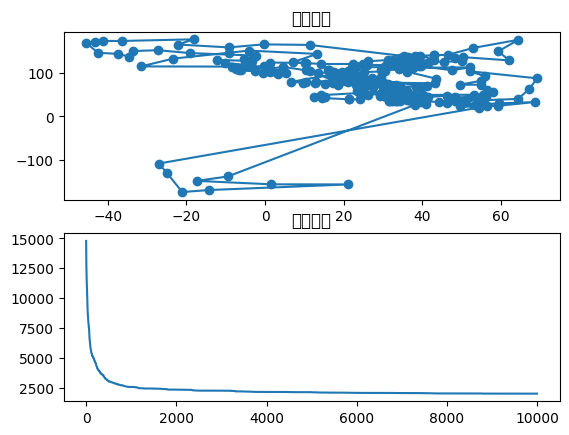

In [7]:
import matplotlib.pyplot as plt
coords = np.array(coords)

best_path = coords[best_path]
best_path = np.vstack([best_path, best_path[0]])
fig, axs = plt.subplots(2, 1, sharex=False, sharey=False)
axs[0].scatter(best_path[:, 0], best_path[:, 1])
best_path = np.vstack([best_path, best_path[0]])
axs[0].plot(best_path[:, 0], best_path[:, 1])
axs[0].set_title('planning results')
iterations = x
best_record = y
axs[1].plot(iterations, best_record)
axs[1].set_title('Convergence curve')
plt.show()


### سعی میکنیم جواب را در نسل کمتری پیدا کنیم
حال اگر تعدادی از ذرات در جمعیت اولیه را( مثلا یک بیستم ) را به طور حریصانه مقدار دهی کنیم، پس از پیمودن تعداد بسیاااار کمتری نسل به جواب های نسبتا خوب میرسیم. هر چند باز هم برای رسیدن به جواب خواسته شده در سوال، باید تعداد زیادی نسل صبر کنیم.

In [8]:
coords = read_file("gr229.txt")
model = ParticleSwarmOptimization(pop_size=200, city_size=len(coords),coordinates= coords,c1=0.1,c2=0.1)
model.initial(greedy_method='low')
x, y, best_path, best_fitness = min_tsp(model, stop_point=1950,stop_gen=10000)


(68.58, 33.0)(64.34, 40.3)(59.55, 30.1)(59.25, 24.4)(56.57, 24.0)(54.43, 20.3)(54.41, 25.1)(53.54, 27.3)(49.5, 24.0)(50.26, 30.3)(46.28, 30.4)(55.45, 37.3)(56.2, 44.0)(55.45, 49.0)(53.12, 50.0)(51.4, 39.1)(50.0, 36.1)(48.27, 34.5)(44.36, 33.3)(47.14, 39.4)(48.44, 44.2)(46.21, 48.0)(41.43, 44.4)(40.11, 44.3)(40.23, 49.5)(58.0, 56.1)(56.51, 60.3)(67.27, 63.5)(69.2, 88.0)(55.0, 73.2)(55.02, 82.5)(56.01, 92.5)(49.5, 73.1)(43.15, 76.5)(41.2, 69.1)(39.4, 66.4)(38.35, 68.4)(43.48, 87.3)(52.16, 104.2)(47.55, 106.5)(52.03, 113.3)(62.13, 129.4)(64.45, 177.2)(53.01, 158.3)(59.34, 150.4)(50.17, 127.3)(50.35, 137.0)(48.27, 135.0)(46.58, 142.4)(43.1, 131.5)(41.01, 28.5)(38.25, 27.0)(39.56, 32.5)(38.43, 35.3)(39.45, 37.0)(39.55, 41.1)(37.55, 40.1)(37.01, 35.1)(36.12, 37.1)(34.44, 36.4)(33.3, 36.1)(33.53, 35.3)(31.57, 35.5)(32.5, 35.0)(32.04, 34.4)(31.46, 35.1)(24.28, 39.3)(21.3, 39.1)(21.27, 39.4)(15.23, 44.1)(14.48, 42.5)(12.45, 45.1)(14.32, 49.0)(23.37, 58.3)(25.18, 55.1)(25.17, 51.3)(26.13, 50.3)(

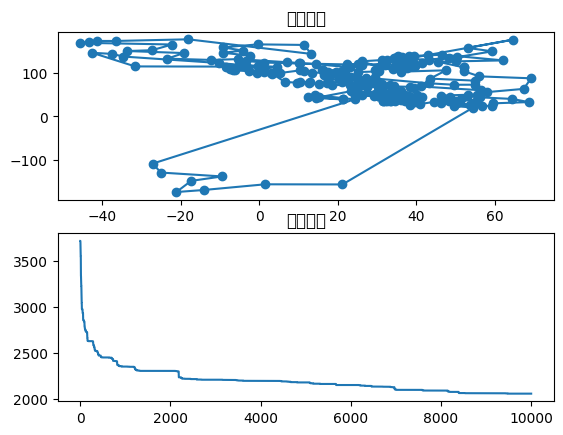

In [9]:
import matplotlib.pyplot as plt
coords = np.array(coords)

best_path = coords[best_path]
best_path = np.vstack([best_path, best_path[0]])
fig, axs = plt.subplots(2, 1, sharex=False, sharey=False)
axs[0].scatter(best_path[:, 0], best_path[:, 1])
best_path = np.vstack([best_path, best_path[0]])
axs[0].plot(best_path[:, 0], best_path[:, 1])
axs[0].set_title('planning results')
iterations = x
best_record = y
axs[1].plot(iterations, best_record)
axs[1].set_title('Convergence curve')
plt.show()


## حریصانه تر کردن الگوریتم
حال اگر پارامتر میزان حریص بودن نسل اولیه را، در حد بالایی بگذاریم، میبینیم که حتی پس از پیمودن چند نسل، به جواب بسیار خوبی میرسیم که جواب خیلی خوبی نسبت به خواسته سوال است. همچنین از نحوه حرکت نمودار که پله ای مانند است معلوم می شود که برای رسیدن به جواب بهتر از جواب قبل چندین نسل باید طی شود، تا یک جهش صورت گیرد و پیشرفتی حاصل شود. همچنین ارتفاع پله ها، میزان پیشرفت حاصل شده است، که به مرور این ارتفاع کمتر میشود.

In [43]:
coords = read_file("gr229.txt")
model = ParticleSwarmOptimization(pop_size=200, city_size=len(coords),coordinates= coords,c1=0.1,c2=0.1)
model.initial(greedy_method='very high')
x, y, best_path, best_fitness = min_tsp(model, stop_point=1800,stop_gen=10000)

(68.58, 33.0)(64.34, 40.3)(59.55, 30.1)(59.25, 24.4)(56.57, 24.0)(54.43, 20.3)(54.41, 25.1)(53.54, 27.3)(49.5, 24.0)(50.26, 30.3)(46.28, 30.4)(55.45, 37.3)(56.2, 44.0)(55.45, 49.0)(53.12, 50.0)(51.4, 39.1)(50.0, 36.1)(48.27, 34.5)(44.36, 33.3)(47.14, 39.4)(48.44, 44.2)(46.21, 48.0)(41.43, 44.4)(40.11, 44.3)(40.23, 49.5)(58.0, 56.1)(56.51, 60.3)(67.27, 63.5)(69.2, 88.0)(55.0, 73.2)(55.02, 82.5)(56.01, 92.5)(49.5, 73.1)(43.15, 76.5)(41.2, 69.1)(39.4, 66.4)(38.35, 68.4)(43.48, 87.3)(52.16, 104.2)(47.55, 106.5)(52.03, 113.3)(62.13, 129.4)(64.45, 177.2)(53.01, 158.3)(59.34, 150.4)(50.17, 127.3)(50.35, 137.0)(48.27, 135.0)(46.58, 142.4)(43.1, 131.5)(41.01, 28.5)(38.25, 27.0)(39.56, 32.5)(38.43, 35.3)(39.45, 37.0)(39.55, 41.1)(37.55, 40.1)(37.01, 35.1)(36.12, 37.1)(34.44, 36.4)(33.3, 36.1)(33.53, 35.3)(31.57, 35.5)(32.5, 35.0)(32.04, 34.4)(31.46, 35.1)(24.28, 39.3)(21.3, 39.1)(21.27, 39.4)(15.23, 44.1)(14.48, 42.5)(12.45, 45.1)(14.32, 49.0)(23.37, 58.3)(25.18, 55.1)(25.17, 51.3)(26.13, 50.3)(

/home/amir/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35268 (\N{CJK UNIFIED IDEOGRAPH-89C4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/amir/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21010 (\N{CJK UNIFIED IDEOGRAPH-5212}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/amir/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/amir/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/amir/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas

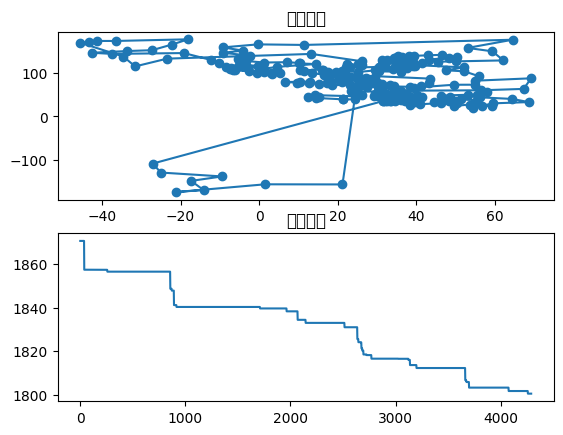

In [44]:
import matplotlib.pyplot as plt
coords = np.array(coords)

best_path = coords[best_path]
best_path = np.vstack([best_path, best_path[0]])
fig, axs = plt.subplots(2, 1, sharex=False, sharey=False)
axs[0].scatter(best_path[:, 0], best_path[:, 1])
best_path = np.vstack([best_path, best_path[0]])
axs[0].plot(best_path[:, 0], best_path[:, 1])
axs[0].set_title('planning results')
iterations = x
best_record = y
axs[1].plot(iterations, best_record)
axs[1].set_title('Convergence curve')
plt.show()


# تست کیس دوم
### خواندن فایل
تست کیس اول که حاوی ۲۲۹ شهر هست را از دایرکتوری که در آن قرار داریم، باز میکنیم.
### تعیین پارامتر ها
حال مدل خود را ساخته، و پارامتر ها را با در نظر گرفتن خواص مسئله مقدار دهی میکنیم. از آنجا که به طور کلی الگوریتم PSO برای مقادر گسسته طراحی نشده، باید یک سری موارد را در نظر بگیریم. مثلا باید تعداد ذرات را بیشتر کنیم، تا بتواند روی مقادیر گسسته مان به خوبی حرکت کنند. من پس از ازمون و خطا متوجه شدم همان مقادیر قبلی برای این که بتواند تاثیر موقعیت های خوب ذره و ازدحام را به طور مناسبی تنظیم کند مناسب است.

In [46]:
test_case_file = open("pr1002.txt", "r")
Lines = test_case_file.readlines()
coords = []
for line in Lines:
    city = (list(line.split(' '))[1:])
    coords.append((float(city[0]), float(city[1])))
for i in coords:
    print(str(i), end='')
    
model = ParticleSwarmOptimization(pop_size=200, city_size=len(
    coords), coordinates=coords, c1=0.1, c2=0.1)
model.initial()
x, y, best_path, best_fitness = min_tsp(model, stop_point=1600000, stop_gen=5000)


(1150.0, 4000.0)(1050.0, 2750.0)(1150.0, 2250.0)(1250.0, 2050.0)(1350.0, 2350.0)(1050.0, 1550.0)(3350.0, 1700.0)(3450.0, 1450.0)(3550.0, 1600.0)(3950.0, 1700.0)(4050.0, 2000.0)(4050.0, 2150.0)(4250.0, 1650.0)(4150.0, 1500.0)(4450.0, 1450.0)(4400.0, 1700.0)(4600.0, 1850.0)(4900.0, 1550.0)(5100.0, 1550.0)(5350.0, 1450.0)(4950.0, 1700.0)(4850.0, 1900.0)(4900.0, 2050.0)(5000.0, 2150.0)(5100.0, 2050.0)(5400.0, 2050.0)(5750.0, 2000.0)(5900.0, 2050.0)(5600.0, 2250.0)(5400.0, 2300.0)(5250.0, 2250.0)(5000.0, 2350.0)(5000.0, 2550.0)(5050.0, 2800.0)(5250.0, 2750.0)(5450.0, 2750.0)(5400.0, 2950.0)(5200.0, 3150.0)(5050.0, 3100.0)(4950.0, 3300.0)(5100.0, 3600.0)(5200.0, 3650.0)(5350.0, 3750.0)(5450.0, 3750.0)(5600.0, 3750.0)(5600.0, 4250.0)(5450.0, 4250.0)(5350.0, 4150.0)(5050.0, 3800.0)(4950.0, 3500.0)(4700.0, 3500.0)(4400.0, 3700.0)(4450.0, 3500.0)(4100.0, 3500.0)(4150.0, 3300.0)(4100.0, 3150.0)(4300.0, 3300.0)(4500.0, 3150.0)(4500.0, 2950.0)(4700.0, 3000.0)(4700.0, 2800.0)(4700.0, 2500.0)(4600.0,

# تحلیل
این تست کیس نیز مانند تست کیس قبل به جواب رسید. ولی نکته جالب توجه این است که حتی با اینکه جمعیت اولیه حریصانه نبود، در زمان بسیار خوبی به جواب رسیدیم، حتی با اینکه  تعداد شهر ها به شدت بیشتر بود. نکته دیگه اینکه با اینکه شکل کلی نمودار بهترین فیتنس بر نسل، مانند تست کیس قبلی است، میزان curve بودن ان بیشتر است. بدان معنا که ناگهان به جواب های نسبتا خوب نمیرسد و وقتی که میرسد هم، اختلاف بین جواب های دو نسل، نسبت به تست قبل کمتر نیست. 

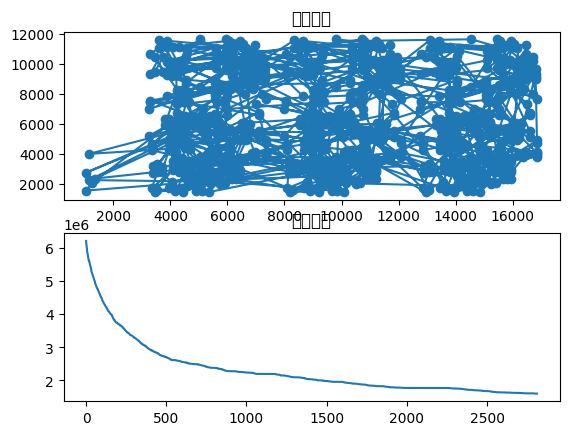

In [47]:
import matplotlib.pyplot as plt
coords = np.array(coords)

best_path = coords[best_path]
best_path = np.vstack([best_path, best_path[0]])
fig, axs = plt.subplots(2, 1, sharex=False, sharey=False)
axs[0].scatter(best_path[:, 0], best_path[:, 1])
best_path = np.vstack([best_path, best_path[0]])
axs[0].plot(best_path[:, 0], best_path[:, 1])
axs[0].set_title('planning results')
iterations = x
best_record = y
axs[1].plot(iterations, best_record)
axs[1].set_title('Convergence curve')
plt.show()
